<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/Borrador_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
import statistics as stats
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chapter 4&5
from sklearn.decomposition import PCA

# Chapter 6
from sklearn.decomposition import IncrementalPCA

# Chapter 7
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

from mpl_toolkits.mplot3d import Axes3D
#from pydiffmap import diffusion_map as dm
#from pydiffmap.visualization import data_plot

# Chapter 8
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import pandas as pd
url="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/train.xlsx?raw=true"
datos=pd.read_excel(url)
url1="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/test.xlsx?raw=true"
test=pd.read_excel(url1)
test

,Ni,Co,Fe,SiO2,MgO,Al2O3,Cr2O3,Mn,Cu,Zn,Na,K,Frente
0,1.19,0.151,41.96,6.96,1.64,5.03,1.98,0.71,NaN,NaN,NaN,NaN,YN
1,1.32,0.074,28.71,21.43,7.19,2.71,1.27,0.57,NaN,NaN,NaN,NaN,YN
2,1.31,0.169,42.99,7.65,1.20,7.63,1.95,1.01,NaN,NaN,NaN,NaN,YN
3,0.82,0.130,37.50,10.27,6.37,8.31,1.16,0.82,NaN,NaN,NaN,NaN,CE
4,1.16,0.150,47.89,2.21,0.42,6.56,NaN,0.89,0.02,0.04,0.03,0.01,CE
5,0.90,0.150,48.20,3.43,2.03,6.15,NaN,1.14,0.02,0.05,0.02,0.00,PG
6,0.68,0.110,42.42,2.77,0.47,12.51,1.39,0.57,0.01,0.02,0.17,0.00,YS
7,1.37,0.110,44.80,4.71,1.70,7.14,1.62,0.64,0.01,0.03,0.11,0.00,CE


In [91]:

datos


,Ni,Co,Fe,SiO2,MgO,Al2O3,Cr2O3,Mn,Cu,Zn,Na,K,Frente
0,1.23,0.130,42.01,8.46,2.98,4.85,2.00,1.00,0.02,0.03,0.21,0.01,YS
1,0.93,0.050,41.59,4.05,0.52,6.05,1.46,0.36,0.02,0.02,0.22,0.01,CE
2,1.10,0.070,44.80,5.87,0.40,14.41,1.35,0.55,0.02,0.02,0.22,0.01,CE
3,1.14,0.080,43.96,5.12,0.96,8.09,1.25,0.57,0.02,0.02,0.22,0.00,CE
4,1.11,0.090,43.98,4.85,0.40,9.99,1.30,0.64,0.02,0.02,0.15,0.01,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1.58,0.104,26.91,23.36,8.03,2.59,1.22,0.47,NaN,NaN,NaN,NaN,YS
406,1.41,0.184,44.37,6.66,1.46,6.23,1.97,0.85,NaN,NaN,NaN,NaN,CE
407,1.19,0.151,41.96,6.96,1.64,5.03,1.98,0.71,NaN,NaN,NaN,NaN,YS
408,1.32,0.074,28.71,21.43,7.19,2.71,1.27,0.57,NaN,NaN,NaN,NaN,YN


In [92]:
datos = datos.dropna(how='all')
datos2 = datos.fillna(0)
datos2

,Ni,Co,Fe,SiO2,MgO,Al2O3,Cr2O3,Mn,Cu,Zn,Na,K,Frente
0,1.23,0.130,42.01,8.46,2.98,4.85,2.00,1.00,0.02,0.03,0.21,0.01,YS
1,0.93,0.050,41.59,4.05,0.52,6.05,1.46,0.36,0.02,0.02,0.22,0.01,CE
2,1.10,0.070,44.80,5.87,0.40,14.41,1.35,0.55,0.02,0.02,0.22,0.01,CE
3,1.14,0.080,43.96,5.12,0.96,8.09,1.25,0.57,0.02,0.02,0.22,0.00,CE
4,1.11,0.090,43.98,4.85,0.40,9.99,1.30,0.64,0.02,0.02,0.15,0.01,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1.58,0.104,26.91,23.36,8.03,2.59,1.22,0.47,0.00,0.00,0.00,0.00,YS
406,1.41,0.184,44.37,6.66,1.46,6.23,1.97,0.85,0.00,0.00,0.00,0.00,CE
407,1.19,0.151,41.96,6.96,1.64,5.03,1.98,0.71,0.00,0.00,0.00,0.00,YS
408,1.32,0.074,28.71,21.43,7.19,2.71,1.27,0.57,0.00,0.00,0.00,0.00,YN


In [110]:
X = datos2.drop(['Frente'], axis=1)
Y= datos2['Frente']
sc = StandardScaler()
X = X.values
X_std =  sc.fit_transform(X)  
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [111]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)


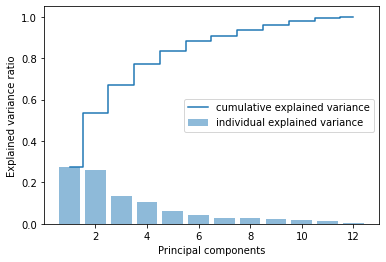

In [95]:
plt.bar(range(1,len(var_explained)+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_explained)+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [96]:
pca = PCA(n_components = 3)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.explained_variance_ratio_

array([0.27550825, 0.25805712, 0.13663797])

In [97]:
pca.explained_variance_ratio_.sum()

0.670203339654495

In [98]:
pca = PCA(n_components = 0.6)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.n_components_

3

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4).fit(X)
principal_comps = pca.transform(X)
pca_db = pd.DataFrame(data = principal_comps, columns=['pca1', 'pca2','pca3','pc4'])
pca_db

,pca1,pca2,pca3,pc4
0,-1.594668,-1.288189,-0.640647,-1.923377
1,-4.861912,2.544870,0.493718,-1.629278
2,-6.978624,-0.654694,3.792861,5.959661
3,-5.994300,0.173648,0.823099,0.395245
4,-6.548184,0.492421,1.928513,1.929806
...,...,...,...,...
405,20.182659,-2.728354,1.319654,-2.740926
406,-5.012149,-1.327519,0.206018,-1.167736
407,-2.909871,0.015214,0.088452,-2.230497
408,17.431709,-2.417952,1.179560,-2.864874


In [112]:
# Adicionemos ahora la columna con la clase correcta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


FRENTE_MAPEO = {'YS':1, 'CE':2,'YN':3,'PG':4 ,'NA':5,'0':6}

Y = Y.map(FRENTE_MAPEO).astype(int)

pca_db['class']=Y

pca_db

,pca1,pca2,pca3,pc4,class
0,-1.594668,-1.288189,-0.640647,-1.923377,1
1,-4.861912,2.544870,0.493718,-1.629278,2
2,-6.978624,-0.654694,3.792861,5.959661,2
3,-5.994300,0.173648,0.823099,0.395245,2
4,-6.548184,0.492421,1.928513,1.929806,2
...,...,...,...,...,...
405,20.182659,-2.728354,1.319654,-2.740926,1
406,-5.012149,-1.327519,0.206018,-1.167736,2
407,-2.909871,0.015214,0.088452,-2.230497,1
408,17.431709,-2.417952,1.179560,-2.864874,3


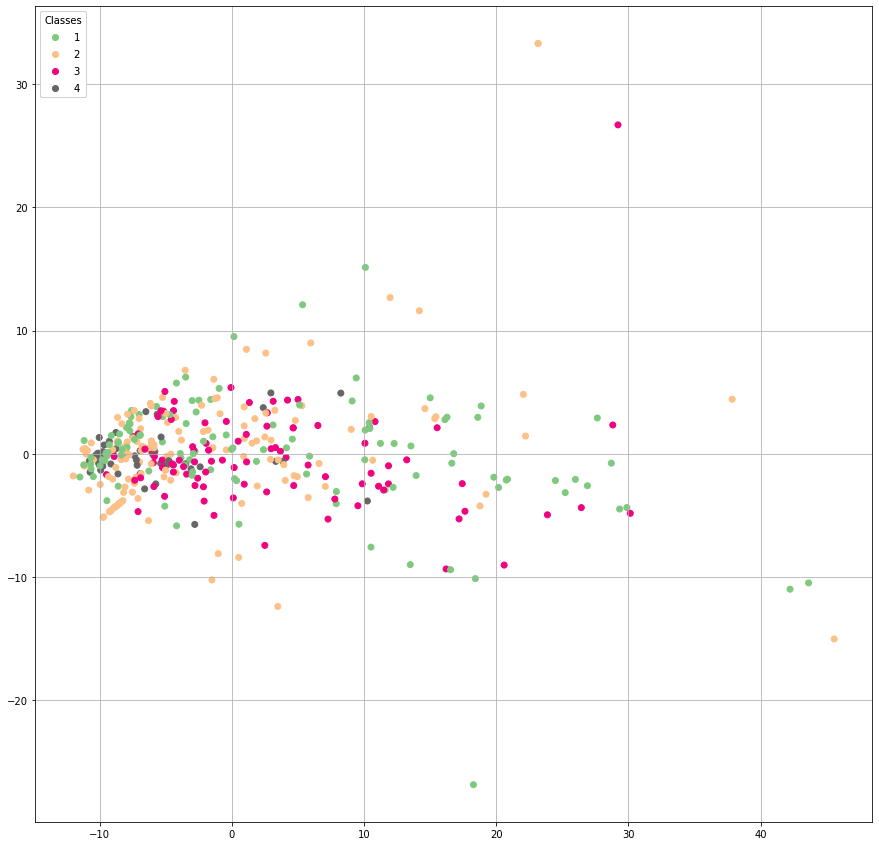

In [182]:
# y visualicemos el resultado
fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(pca_db['pca1'], pca_db['pca2'],c=pca_db['class'], cmap="Accent")
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.grid(True)
plt.show()

In [119]:
y_test= test['Frente']
y_test=y_test.map(FRENTE_MAPEO).astype(int)
x_test= test.drop(['Frente'], axis=1)
x_test =x_test.fillna(0)
y_test,x_test


(0    3
 1    3
 2    3
 3    2
 4    2
 5    4
 6    1
 7    2
 Name: Frente, dtype: int64,
      Ni     Co     Fe   SiO2   MgO  Al2O3  Cr2O3    Mn    Cu    Zn    Na     K
 0  1.19  0.151  41.96   6.96  1.64   5.03   1.98  0.71  0.00  0.00  0.00  0.00
 1  1.32  0.074  28.71  21.43  7.19   2.71   1.27  0.57  0.00  0.00  0.00  0.00
 2  1.31  0.169  42.99   7.65  1.20   7.63   1.95  1.01  0.00  0.00  0.00  0.00
 3  0.82  0.130  37.50  10.27  6.37   8.31   1.16  0.82  0.00  0.00  0.00  0.00
 4  1.16  0.150  47.89   2.21  0.42   6.56   0.00  0.89  0.02  0.04  0.03  0.01
 5  0.90  0.150  48.20   3.43  2.03   6.15   0.00  1.14  0.02  0.05  0.02  0.00
 6  0.68  0.110  42.42   2.77  0.47  12.51   1.39  0.57  0.01  0.02  0.17  0.00
 7  1.37  0.110  44.80   4.71  1.70   7.14   1.62  0.64  0.01  0.03  0.11  0.00)

In [120]:
# Entrenemos el modelo
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000, tol=1e-3)
model.fit(x_train, y_train)

SGDClassifier()

In [121]:
from sklearn import metrics
predicted_train = model.predict(x_train)
metrics.accuracy_score(y_train, predicted_train)

0.801829268292683

In [122]:
#Llevando los componentes de pruba al mismo redimensionamiento que los de entrenamiento
x_reduced=pca_db
x_train, x_test, y_train, y_test = train_test_split(x_reduced, Y, test_size = 0.2, random_state = 1) 


In [123]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=4), SGDClassifier(max_iter=1000, tol=1e-3))    

pipe.fit(x_train, y_train)
pipe_test = pipe.predict(x_test)
metrics.accuracy_score(y_test, pipe_test)

0.7439024390243902

Con una correlación del 0.7439024390243902 con los datos de prueba (que no participan en el entrenamiento del sistema) y luego de varios intentos se procede a mantener 4 componentes principales.

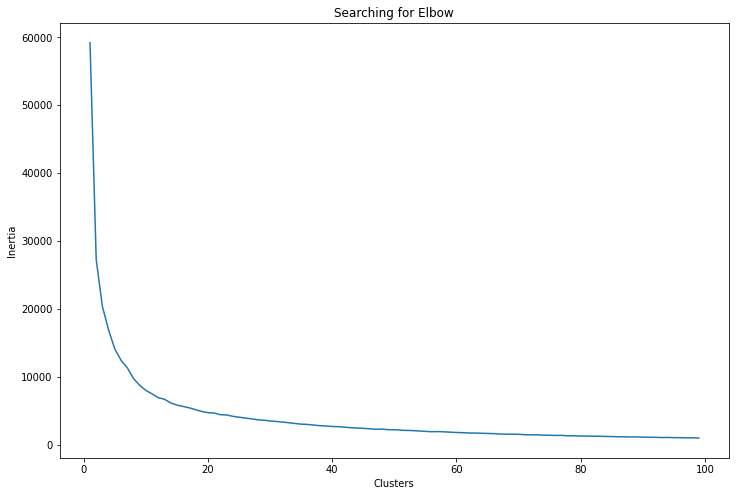

In [132]:
import seaborn as sn
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 100):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sn.lineplot(x=list(range(1, 100)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [163]:
X = pca_db
X

,pca1,pca2,pca3,pc4,class,Labels
0,-1.594668,-1.288189,-0.640647,-1.923377,1,5
1,-4.861912,2.544870,0.493718,-1.629278,2,5
2,-6.978624,-0.654694,3.792861,5.959661,2,7
3,-5.994300,0.173648,0.823099,0.395245,2,5
4,-6.548184,0.492421,1.928513,1.929806,2,7
...,...,...,...,...,...,...
405,20.182659,-2.728354,1.319654,-2.740926,1,4
406,-5.012149,-1.327519,0.206018,-1.167736,2,5
407,-2.909871,0.015214,0.088452,-2.230497,1,5
408,17.431709,-2.417952,1.179560,-2.864874,3,2


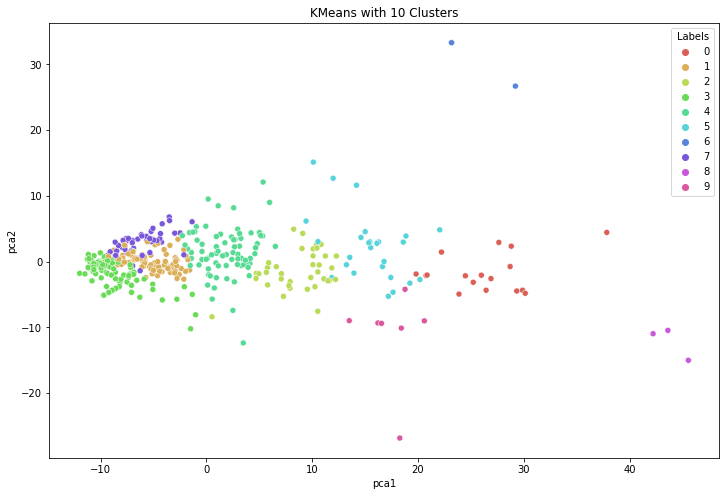

In [188]:
# 10 cluster
km10= KMeans(n_clusters=10).fit(X)

X['Labels'] = km10.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 10),cmap="Pastel1")
plt.title('KMeans with 10 Clusters')
plt.show()

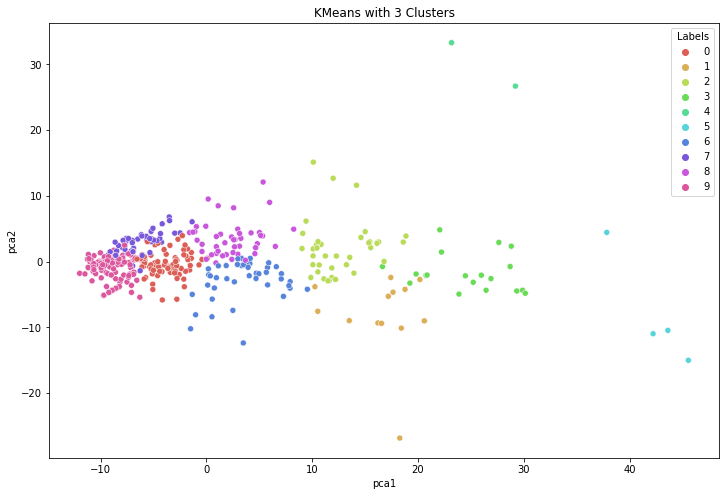

In [202]:
# 3 cluster
km3 = KMeans(n_clusters=10).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 10))
plt.title('KMeans with 3 Clusters')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you

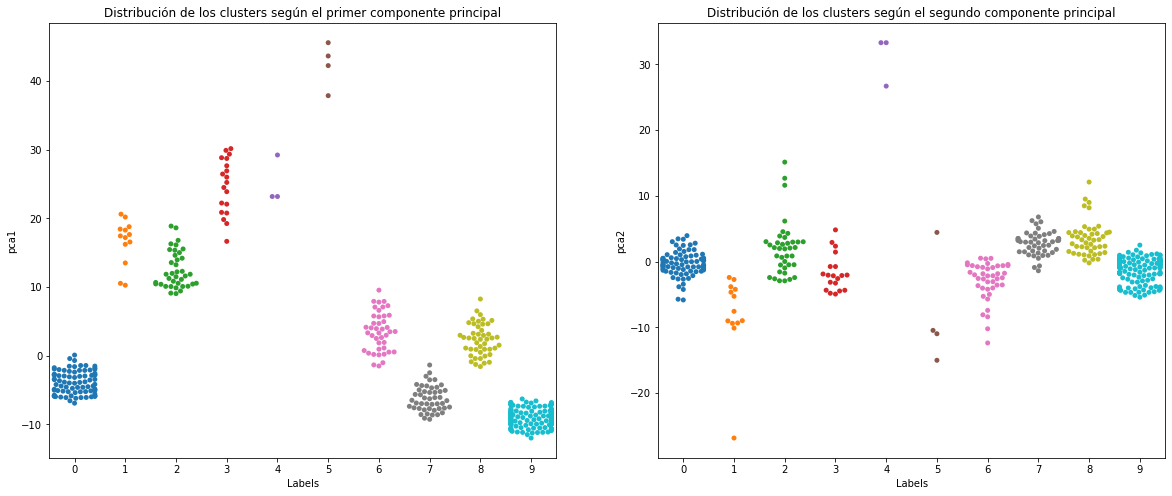

In [220]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sn.swarmplot(x='Labels', y='pca1', data=X, ax=ax)
ax.set_title('Distribución de los clusters según el primer componente principal')

ax = fig.add_subplot(122)
sn.swarmplot(x='Labels', y='pca2', data=X, ax=ax)
ax.set_title('Distribución de los clusters según el segundo componente principal')
plt.show()

In [ ]:
sns.catplot(x = "class", y = "pca1", data =pca_db, kind = "violin");

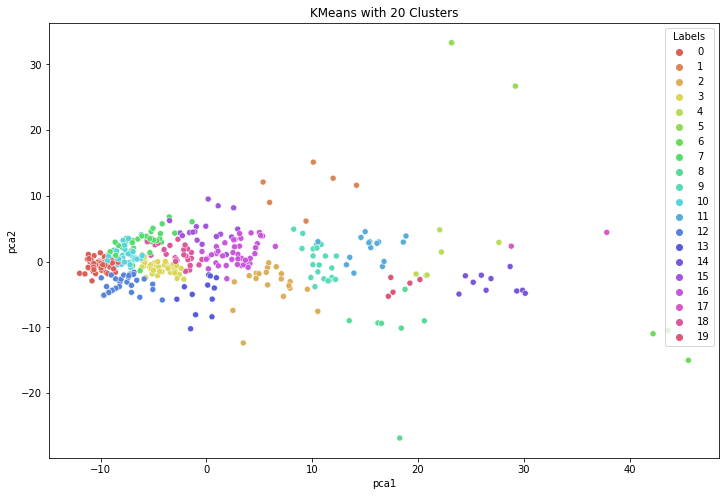

In [186]:
# 20 cluster
km10= KMeans(n_clusters=20).fit(X)

X['Labels'] = km10.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls',20), cmap="Pastel1")
plt.title('KMeans with 20 Clusters')
plt.show()



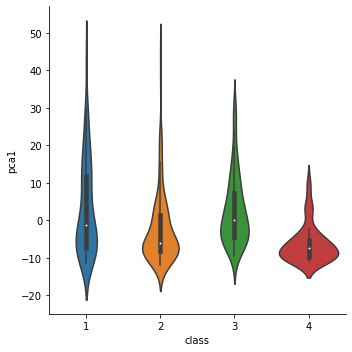

In [217]:

sns.catplot(x = "class", y = "pca1", data =pca_db, kind = "violin");
